## Moving Normalization out of Model
This notebook uses models trained on MDTB-s1 and evaluated on MDTB-s2 with within-model normalization and out-of-model normalization.
Normalization is subtracting the mean out of X and Y and also standardize X with `parcel` mode and cerebellum with `global` mode.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
from statannotations.Annotator import Annotator
import Functional_Fusion.dataset as fdata
import glob
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at /tmp/matplotlib-zgznb4m1 because the default path (/localscratch/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
def plot_with_error(df, x_var, y_var, title, error='se'):
    means = df.groupby(x_var)['R_eval'].mean().sort_values(ascending=True)
    ax = sns.barplot(data=df, x=x_var, y=y_var, hue=x_var, errorbar=error, order=means.index.to_list())
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.4f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_title(title) 
    return ax, means

### Evaluation of S1 model on S2

In [3]:
df1=rm.comb_eval(models=['MDs1-ind-scale'],methods=['L2regression'],eval_data=['MDTBs2'],cerebellum='SUIT3')
df1['model_type'] = df1.mname
df1.loc[df1.subj_id != df1.eval_subj,'model_type']='diff'
df1.loc[df1.subj_id == df1.eval_subj,'model_type']='same'

df2=rm.comb_eval(models=['MDs1-ind-normalized'],methods=['L2reg'],eval_data=['MDTBs2'],cerebellum='MNISymC3')
df2['model_type'] = df2.mname
df2.loc[df2.subj_id != df2.eval_subj,'model_type']='diff'
df2.loc[df2.subj_id == df2.eval_subj,'model_type']='same'

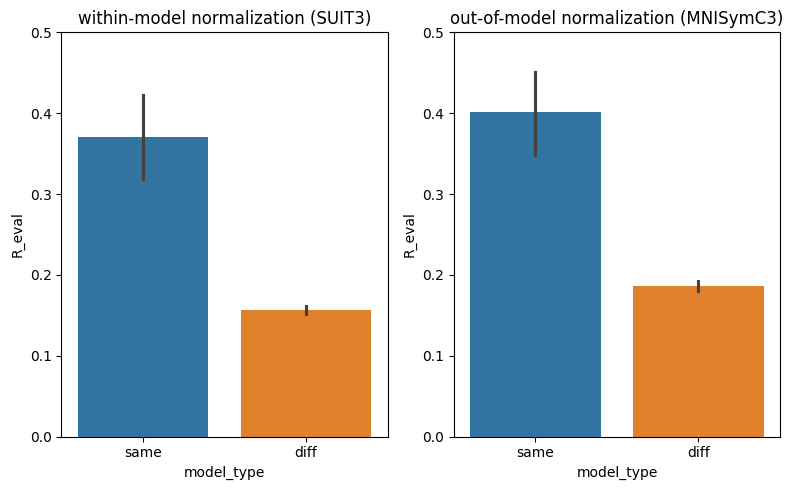

In [6]:
plt.subplots(1,2,figsize=(8,5))
plt.subplot(1,2,1)
sns.barplot(data=df1[df1['logalpha']==8],x='model_type',y='R_eval',hue='model_type')
plt.title('within-model normalization (SUIT3)')
plt.ylim([0, .5])
plt.subplot(1,2,2)
sns.barplot(data=df2[df2['logalpha']==8],x='model_type',y='R_eval',hue='model_type')
plt.title('out-of-model normalization (MNISymC3)')
plt.ylim([0, .5])
plt.tight_layout()

In [7]:
df1=rm.comb_eval(models=['MDs1-ind-scale', 'MDs1-loo-scale', 'MDs1-avg-scale', 'bayes_no_prior', 'bayes_no_prior_vox'],methods=['L2regression'],eval_data=['MDTBs2'],cerebellum='SUIT3')
df1['model_type'] = df1.model
df1.loc[df1.model.isna() & (df1.subj_id != df1.eval_subj),'model_type']='diff'
df1.loc[df1.model.isna() & (df1.subj_id == df1.eval_subj),'model_type']='same'

df2=rm.comb_eval(models=['ind', 'loo', 'avg', 'bayes', 'bayes_vox'],methods=['L2reg'],eval_data=['MDTBs2'],cerebellum='MNISymC3')
df2['model_type'] = df2.model
df2.loc[df2.model.isna() & (df2.subj_id != df2.eval_subj),'model_type']='diff'
df2.loc[df2.model.isna() & (df2.subj_id == df2.eval_subj),'model_type']='same'

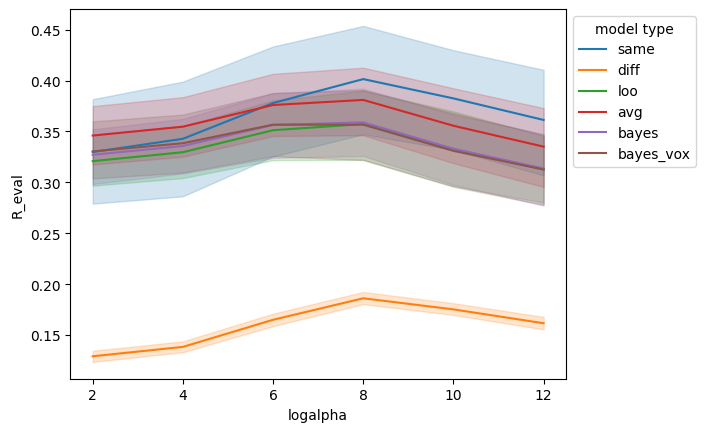

In [15]:
means = df2.groupby('model_type')['R_eval'].mean().sort_values(ascending=True)
sns.lineplot(data=df2, y='R_eval', x='logalpha', hue='model_type', palette="tab10")
plt.legend(title='model type', bbox_to_anchor=(1,1), loc='upper left')

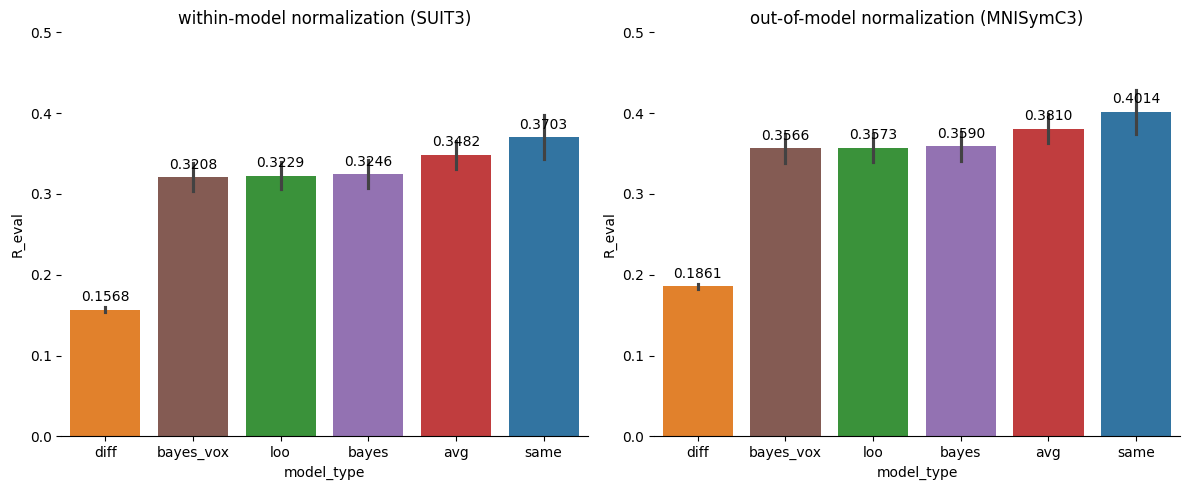

In [16]:
logalpha = [8]#[6, 8, 10]

plt.subplots(1,2,figsize=(12,5))
plt.subplot(1,2,1)
plot_with_error(df=df1[df1['logalpha'].isin(logalpha)], x_var='model_type', y_var='R_eval', title='within-model normalization (SUIT3)')
plt.ylim([0, .5])
plt.subplot(1,2,2)
ax, means = plot_with_error(df=df2[df2['logalpha'].isin(logalpha)], x_var='model_type', y_var='R_eval', title='out-of-model normalization (MNISymC3)')
plt.ylim([0, .5])
plt.tight_layout()